# Intelligent Agents: Vacuum-cleaner World

Implement a simulator environment for a vacuum-cleaner world and a set of intelligent agents.

## PEAS description

__Performance Measure:__ Each action costs 1. The performance is measured as the sum of the cost to clean the whole environment.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size of the layout of the room (i.e., it knows n and where it starts).

__Actuators:__ The agent can `clean` the current square or move to an adjacent square by going `north`, `east`, `west`, or `south`.

__Sensors:__ Four bumper sensors, one for north`, `east`, `west`, and `south`; a dirt sensor reporting dirt in the current square.  

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop untill all squares are clean or a predefined number of steps have been reached.

## Define the agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictonary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`; not specified bumpers are assumed to be `False`. E.g., if the agent is on the north-west corner, `bumpers` gets `{"north" : True, "west" : True}` or if the agent is not close to a border then it gets `{}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [39]:
from numpy import random

actions = ["north", "east", "west", "south", "suck"]


def simple_randomized_agent(bumpers, dirty):
    return random.choice(actions)

In [40]:
simple_randomized_agent({"north" : True}, True)

'south'

## Simple environment example

The environment is infinite in size (bumpers are always `False`) and every square is dirty. We run the agent for 10 times steps.

In [41]:
for i in range(10):
    print(simple_randomized_agent({"north" : False, "south" : False, "west" : False, "east" : False}, True))

south
east
suck
south
south
west
north
north
north
east


# Tasks

_Submission Instructions:_ Use this notebook to prepare your submission. Complete this section with your code and results. You can use Markdown blocks for your description, comments in the code and use mathplotlib to produce charts. If you use external code files then you can include them with 

```
from notebook import psource
psource("your_file.py")
```

_Note:_ Try to keep the code simple! In this couse, we want to learn about the algorithms and we often do not need to use object-oriented design. 


## Task 1: Implement a simulation environment

Your environment simulator needs to create squares, make some dirty, and proivde the agent function with the sensor inputs. The environment needs to evaluate the performance measure. It needs to track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The simulation environment needs to work with the simple randomized agent program from above.

Here the agent will clean the room randomly. It is started in a random position on the map, and it will randomly choose an action from the five choices. If it hits the will, it will get stuck and do nothing until the next round. From the data, we can find out that the simple-randomized agent takes a lot of steps(cost) to clean the room, and the results from the tests are various. Therefore, it's maybe not well rational.

In [42]:
import random
import numpy as np 
import copy

actions_simple_randomized = ["north", "east", "west", "south", "suck"]          # Types of action for task 1

def checkClear(Matrix):                  # Check is there any dirty point left
    for i in Matrix:
        for j in i:
            if(j != False):
                return False
    return True

                
def Analysis_Bumper(row, column, lengthoftable):       # Return the bumpers that indicate walls
    newbound = {}
    if(row == 0):
        newbound["north"] = "True"
    if(row == lengthoftable - 1):
        newbound["south"] = "True"
    if(column == 0):
        newbound["west"] = "True"
    if(column == lengthoftable - 1):
        newbound["east"] = "True"
    return newbound


def simple_randomized_agent(lengthoftable, maxstep,p, printed):
    Matrix = np.random.choice(a=[False,True], size=(lengthoftable,lengthoftable), p = [p, 1-p])  # Create the environment
    CurrentRow = random.randint(0,lengthoftable - 1)           # Randomly set start point
    CurrentColumn = random.randint(0,lengthoftable - 1)
    
    if(printed == True) : print("Room:\n", Matrix) 
    
    for i in range(maxstep):
        Ndirty = np.sum(Matrix)             # The number of dirty points 
        newBound = Analysis_Bumper(CurrentRow, CurrentColumn, lengthoftable)    # Analyze bounds
        
        if(printed == True) :
            print("===========================")
            print("Step: ", i)
            print("Dirty parts left: ", Ndirty)
            print("Current Position: [", CurrentRow, "," , CurrentColumn , "]")
            print("Bumper: ", newBound)
            print("Dirty: ", Matrix[CurrentRow, CurrentColumn])
            
        Newaction = random.choice(actions_simple_randomized)             # The simple_randomized_agent will choose the action randomly
        
        if(printed == True) : print("Action: ", Newaction)          # Processing Actions 
        if(Newaction == "north" and CurrentRow != 0) : CurrentRow = CurrentRow - 1 
        if(Newaction == "south" and CurrentRow != lengthoftable - 1) : CurrentRow = CurrentRow + 1
        if(Newaction == "east" and CurrentColumn != lengthoftable - 1) : CurrentColumn = CurrentColumn + 1
        if(Newaction == "west" and CurrentColumn != 0) : CurrentColumn = CurrentColumn - 1
        if(Newaction == "suck") :  Matrix[CurrentRow, CurrentColumn] = False
        
        if(checkClear(Matrix)) :
            if(printed == True):
                print("All the dirty points have been cleared")
            return i
        if(i == maxstep - 1) :
            if(printed == True):
                print("Reach the max number of steps")
            return i


702.639


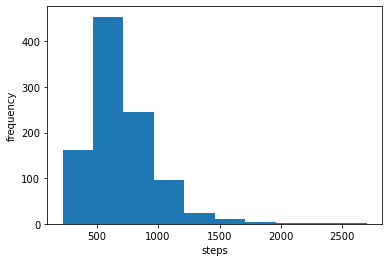

In [43]:
N = 1000

Steps = np.repeat(0, N)
for i in range(N):
    Steps[i] =  simple_randomized_agent(5,20000,0.2,False)
    
print(np.mean(Steps))

import matplotlib.pyplot as plt
plt.hist(Steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()

## Task 2:  Implement a simple reflex agent

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking.

Here we keep the environment to be the same, but a simple reflex agent that will detect the wall and check the floor. If the floor is clean, it will not do suck. Also, if it reaches the top-right, it will not do west or north. From the result, we can find out that using a more intelligent agent will reduce the cost, which is a good sign in Performance Measure. 

In [44]:
actions_simple_reflex = ["north", "east", "west", "south"]             # Types of action for task 2

def simple_reflex_agent(lengthoftable, maxstep,p,printed):
    Matrix = np.random.choice(a=[False,True], size=(lengthoftable,lengthoftable), p = [p, 1-p])
    CurrentRow = random.randint(0,lengthoftable - 1)
    CurrentColumn = random.randint(0,lengthoftable - 1)
    
    if(printed == True) : print("Room:\n", Matrix)
    
    for i in range(maxstep):
        Ndirty = np.sum(Matrix)
        newBound = Analysis_Bumper(CurrentRow, CurrentColumn, lengthoftable)
        
        if(printed == True) :
            print("===========================")
            print("Step: ", i)
            print("Dirty parts left: ", Ndirty)
            print("Current Position: [", CurrentRow, "," , CurrentColumn , "]")
            print("Bumper: ", newBound)
            print("Dirty: ", Matrix[CurrentRow, CurrentColumn])
            
        NewChoice = copy.deepcopy(actions_simple_reflex)        # Use Deep Copy to create a list of action choices so that I can do remove
        
        for j in newBound:
            NewChoice.remove(j)                                 # Remove the impossible actions
            
        if(Matrix[CurrentRow, CurrentColumn] == True):      # If the current place is dirty, the only action will be suck
            Matrix[CurrentRow, CurrentColumn] = False
            if(printed == True):
                print("Action: suck")
        else:
            Newaction = random.choice(NewChoice)
            if(printed == True) :
                print("Action: ", Newaction)
            if(Newaction == "north") : CurrentRow = CurrentRow - 1 
            if(Newaction == "south") : CurrentRow = CurrentRow + 1
            if(Newaction == "east") : CurrentColumn = CurrentColumn + 1
            if(Newaction == "west") : CurrentColumn = CurrentColumn - 1
        
        if(checkClear(Matrix)) :
            if(printed == True):
                print("All the dirty points have been cleared")
            return i
        if(i == maxstep - 1) :
            if(printed == True):
                print("Reach the max number of steps")
            return i 

183.508


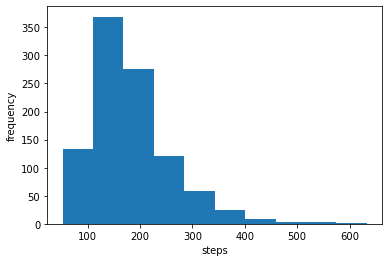

In [45]:
N = 1000

Steps = np.repeat(0, N)
for i in range(N):
    Steps[i] =  simple_reflex_agent(5,20000,0.2,False)
    
print(np.mean(Steps))

import matplotlib.pyplot as plt
plt.hist(Steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()

## Task 3: Implement a model-based reflex agent 

This agent keeps track of the location and remembers where it has cleaned. Assume the agent knows how many squares the room has and where it starts. It can now use more advanced navigation.

How will your agent perform if it is put into a larger room, if the room contains obstacles, or it starts in a random square?

For the model-based reflex agent, it will firstly go to the top-left (because we set the start position randomly), and then it will go over the environment in a "s path." Since it won't go where it's already cleaned, it will has shorter cost than the previous agents. The random numbers in the result is because of the random start position, so if we keep it at top-left, the result may be more constant. However, the problem for this agent is that it cannot deal with obstacles; it can only clean a perfectly-square environment.

In [46]:
def model_reflex_agent(lengthoftable,p,printed):
    step = 0
    Matrix = np.random.choice(a=[False,True], size=(lengthoftable,lengthoftable), p = [p, 1-p])
    CurrentRow = random.randint(0,lengthoftable - 1)
    CurrentColumn = random.randint(0,lengthoftable - 1)
    
    if(printed == True) : print("Room:\n", Matrix, "\nStarts at: [" ,CurrentRow, "," ,CurrentColumn , "]" )
    
    while(CurrentRow != 0):             # Since the start location is random, the agent will firstly go to the top-left
        CurrentRow = CurrentRow - 1
        step = step + 1                 
    while(CurrentColumn != 0):
        CurrentColumn = CurrentColumn - 1
        step = step + 1
    if(printed == True):
        print("Steps to return to the top-left point", step)
    
    
    for i in range(lengthoftable):                  # The idea is cleaning the room with a s shape path
        if(CurrentColumn == 0):
            while(CurrentColumn < lengthoftable - 1):
                if(Matrix[i][CurrentColumn] == True):           # If the current position is dirty
                    step = step + 1
                    if(printed == True):
                        print("===========================")
                        print("Step: ", step)
                        print("Dirty parts left: ", np.sum(Matrix))
                        print("Current Position: [", CurrentRow, "," , CurrentColumn , "]")
                        print("Dirty: ", Matrix[CurrentRow, CurrentColumn])
                        print("Action: suck")                     
                    Matrix[i][CurrentColumn] = False
                else:
                    step = step + 1                     # If it's clean, go to the east
                    if(printed == True):
                        print("===========================")
                        print("Step: ", step)
                        print("Dirty parts left: ", np.sum(Matrix))
                        print("Current Position: [", CurrentRow, "," , CurrentColumn , "]")
                        print("Dirty: ", Matrix[CurrentRow, CurrentColumn])
                        print("Action: east")  
                    CurrentColumn = CurrentColumn + 1
            if(Matrix[i][CurrentColumn] == True):                  # Clean the last one in the column
                step = step + 1
                if(printed == True):
                    print("===========================")
                    print("Step: ", step)
                    print("Dirty parts left: ", np.sum(Matrix))
                    print("Current Position: [", CurrentRow, "," , CurrentColumn , "]")
                    print("Dirty: ", Matrix[CurrentRow, CurrentColumn])
                    print("Action: suck")        
                Matrix[i][CurrentColumn] = False
        else:                                           # If the column is started from the east to west
            while(CurrentColumn > 0):
                if(Matrix[i][CurrentColumn] == True):
                    step = step + 1
                    if(printed == True):
                        print("===========================")
                        print("Step: ", step)
                        print("Dirty parts left: ", np.sum(Matrix))
                        print("Current Position: [", CurrentRow, "," , CurrentColumn , "]")
                        print("Dirty: ", Matrix[CurrentRow, CurrentColumn])
                        print("Action: suck")        
                    Matrix[i][CurrentColumn] = False
                else:
                    step = step + 1
                    if(printed == True):
                        print("===========================")
                        print("Step: ", step)
                        print("Dirty parts left: ", np.sum(Matrix))
                        print("Current Position: [", CurrentRow, "," , CurrentColumn , "]")
                        print("Dirty: ", Matrix[CurrentRow, CurrentColumn])
                        print("Action: west") 
                    CurrentColumn = CurrentColumn - 1
            if(Matrix[i][CurrentColumn] == True):
                step = step + 1
                if(printed == True):
                    print("===========================")
                    print("Step: ", step)
                    print("Dirty parts left: ", np.sum(Matrix))
                    print("Current Position: [", CurrentRow, "," , CurrentColumn , "]")
                    print("Dirty: ", Matrix[CurrentRow, CurrentColumn])
                    print("Action: suck")        
                Matrix[i][CurrentColumn] = False
        if(printed == True and CurrentRow != lengthoftable - 1):            #If one column is finished, go down the the next one
            print("===========================")
            print("Step: ", step)
            print("Dirty parts left: ", np.sum(Matrix))
            print("Current Position: [", CurrentRow, "," , CurrentColumn , "]")
            print("Dirty: ", Matrix[CurrentRow, CurrentColumn])
            print("Action: south")  
        CurrentRow = CurrentRow + 1
        step = step + 1
    return step - 1                                     # The final step will leads to out of bound, so we don't need that step

48.072


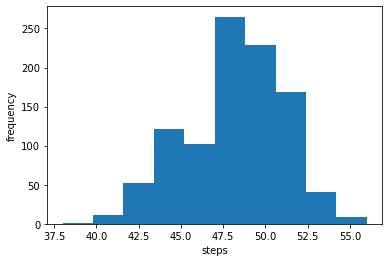

In [47]:
N = 1000

Steps = np.repeat(0, N)
for i in range(N):
    Steps[i] =  model_reflex_agent(5,0.2,False)
    
print(np.mean(Steps))

import matplotlib.pyplot as plt
plt.hist(Steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()

## Task 4: Simulation study

Compare the performance of the agents using different size environments. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use at least 100 random runs for each.

From the comparison, we can find out that the randomized agents are useless in a large environment. They work fine in 5 by 5 and 10 by 10, but for 100 by 100, both of them hit the maximum steps requirement. Therefore, they may not be rational enough compared to the model-based agent. However, the simple agents' potential benefit is that they may eventually clean all the places, but for the model-based agent, it will be failed and get stuck if the environment is not optimal or has obstacles.

5 by 5 simple_randomized agent has average:  682.94
10 by 10 simple_randomized agent has average:  4174.29
100 by 100 simple_randomized agent has average:  19999.0
5 by 5 simple_reflex_agent has average:  185.28
10 by 10 simple_reflex_agent has average:  1352.13
100 by 100 simple_reflex agent has average:  19999.0
5 by 5 model_reflex agent has average:  48.035
10 by 10 model_reflex agent has average:  187.93
100 by 100 model_reflex agent has average:  18100.51


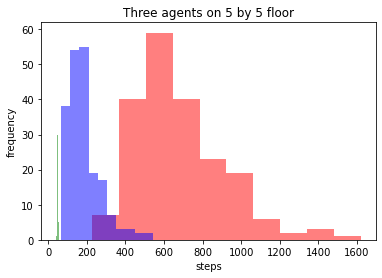

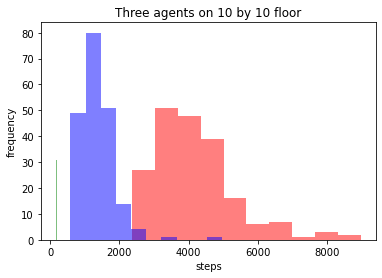

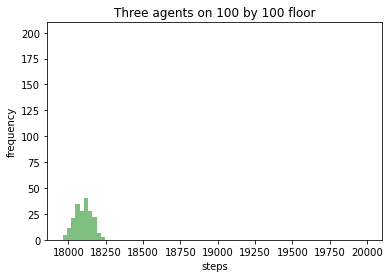

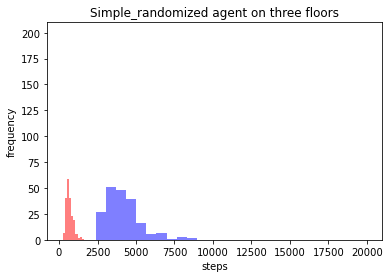

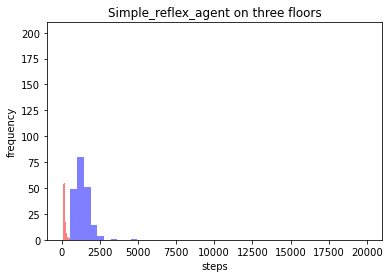

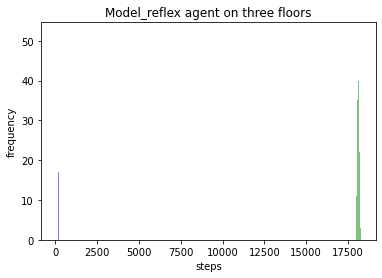

In [48]:
N = 200
Steps11 = np.repeat(0, N)
Steps12 = np.repeat(0, N)
Steps13 = np.repeat(0, N)
Steps21 = np.repeat(0, N)
Steps22 = np.repeat(0, N)
Steps23 = np.repeat(0, N)
Steps31 = np.repeat(0, N)
Steps32 = np.repeat(0, N)
Steps33 = np.repeat(0, N)
for i in range(N):
    Steps11[i] =  simple_randomized_agent(5,20000,0.2,False)
    Steps12[i] =  simple_randomized_agent(10,20000,0.2,False)
    Steps13[i] =  simple_randomized_agent(100,20000,0.2,False)
    Steps21[i] =  simple_reflex_agent(5,20000,0.2,False)
    Steps22[i] =  simple_reflex_agent(10,20000,0.2,False)
    Steps23[i] =  simple_reflex_agent(100,20000,0.2,False)
    Steps31[i] =  model_reflex_agent(5,0.2,False)
    Steps32[i] =  model_reflex_agent(10,0.2,False)
    Steps33[i] =  model_reflex_agent(100,0.2,False)

print("5 by 5 simple_randomized agent has average: ", np.mean(Steps11))
print("10 by 10 simple_randomized agent has average: ", np.mean(Steps12))
print("100 by 100 simple_randomized agent has average: ", np.mean(Steps13))
print("5 by 5 simple_reflex_agent has average: ", np.mean(Steps21))
print("10 by 10 simple_reflex_agent has average: ", np.mean(Steps22))
print("100 by 100 simple_reflex agent has average: ", np.mean(Steps23))
print("5 by 5 model_reflex agent has average: ", np.mean(Steps31))
print("10 by 10 model_reflex agent has average: ", np.mean(Steps32))
print("100 by 100 model_reflex agent has average: ", np.mean(Steps33))

import matplotlib.pyplot as plt

fig1 = plt.figure()
ax = fig1.add_subplot(1,1,1)
ax.hist(Steps11, bins=10, color='red', alpha=0.5)
ax.hist(Steps21, bins=10, color='blue',alpha=0.5)
ax.hist(Steps31, bins=10, color='green',alpha=0.5)
plt.title("Three agents on 5 by 5 floor")
plt.xlabel("steps")
plt.ylabel("frequency")

fig2 = plt.figure()
ax1 = fig2.add_subplot(1,1,1)
ax1.hist(Steps12, bins=10, color='red', alpha=0.5)
ax1.hist(Steps22, bins=10, color='blue',alpha=0.5)
ax1.hist(Steps32, bins=10, color='green',alpha=0.5)
plt.title("Three agents on 10 by 10 floor")
plt.xlabel("steps")
plt.ylabel("frequency")

fig3 = plt.figure()
ax2 = fig3.add_subplot(1,1,1)
ax2.hist(Steps13, bins=10, color='red', alpha=0.5)
ax2.hist(Steps23, bins=10, color='blue',alpha=0.5)
ax2.hist(Steps33, bins=10, color='green',alpha=0.5)
plt.title("Three agents on 100 by 100 floor")
plt.xlabel("steps")
plt.ylabel("frequency")

fig4 = plt.figure()
ax3 = fig4.add_subplot(1,1,1)
ax3.hist(Steps11, bins=10, color='red', alpha=0.5)
ax3.hist(Steps12, bins=10, color='blue',alpha=0.5)
ax3.hist(Steps13, bins=10, color='green',alpha=0.5)
plt.title("Simple_randomized agent on three floors")
plt.xlabel("steps")
plt.ylabel("frequency")

fig5 = plt.figure()
ax4 = fig5.add_subplot(1,1,1)
ax4.hist(Steps21, bins=10, color='red', alpha=0.5)
ax4.hist(Steps22, bins=10, color='blue',alpha=0.5)
ax4.hist(Steps23, bins=10, color='green',alpha=0.5)
plt.title("Simple_reflex_agent on three floors")
plt.xlabel("steps")
plt.ylabel("frequency")

fig6 = plt.figure()
ax5 = fig6.add_subplot(1,1,1)
ax5.hist(Steps31, bins=10, color='red', alpha=0.5)
ax5.hist(Steps32, bins=10, color='blue',alpha=0.5)
ax5.hist(Steps33, bins=10, color='green',alpha=0.5)
plt.title("Model_reflex agent on three floors")
plt.xlabel("steps")
plt.ylabel("frequency")

plt.show()



## Bonus tasks

* __Obstacles:__ Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. How does this change the performance?
* __Unknown environment with obstacles:__ The agent does not know how large the environment is, where it starts or where the obstacles are.
* __Utility-based agent:__ Change the environment, so each square has a fixed probability of getting dirty again. Give this information to the agent (as a 2-dimensional array of probabilities). Cleaning one dirty square produces the utility of 1. Implement a utility-based agent that maximizes the expected utility over a time horizon of 10000 time steps. This is very tricky!

For the problem of Obstacles, I use a modified DFS search to go through every place that the machine can go, can it will do suck if the floor is dirty. I set the start position to be 0,0 and manually create two obstacles because I'm worried about if the machine is rounded by obstacles or if there is a dirty place is rounded by obstacles. The agent will look at all the fresh places around and choose one to go. If there is no unvisited place around, it will retreat back. The problem for this agents is, it will keep searching even there is no dirty place and eventually go back to the start position, which may takes some costs.

For the Unknown environment with obstacles: Although I didn't make a code for that, my idea is to use the same agent but let the agent identify obstacles as visited the place while it hit it.

For the Utility-based agent, my idea is it depends on how observable the machine is. Since the first cleaned place may has a higher opportunity to be dirty again. Therefore, we can create a loop to let the agent follow the path again and again. 

In [3]:
import numpy as np 

def Check_remaining(Matrix):                                    # Count how many dirty points left
    total = 0
    for i in Matrix:
        for j in i:
            if(j == "True"):
                total = total + 1
    return total


def Analyze_Neighbour(currentpair, Visited, lengthoftable, printed):
    choice = []
    if(currentpair[0] != 0):                                            # Check if the north is not a wall or an obstacle
        if(Visited[currentpair[0] - 1][currentpair[1]] != 1):
            choice.append((currentpair[0] - 1, currentpair[1]))
            
    if(currentpair[1] != 0):                                            # Check if the south is not a wall or an obstacle
        if(Visited[currentpair[0]][currentpair[1] - 1] != 1):
            choice.append((currentpair[0], currentpair[1] -1))
            
    if(currentpair[0] != lengthoftable - 1):                            # Check if the west is not a wall or an obstacle
        if(Visited[currentpair[0] + 1][currentpair[1]] != 1):
           choice.append((currentpair[0] + 1, currentpair[1]))  
           
    if(currentpair[1] != lengthoftable - 1):                           # Check if the east is not a wall or an obstacle
        if(Visited[currentpair[0]][currentpair[1] + 1] != 1):
            choice.append((currentpair[0], currentpair[1] + 1))
    if(len(choice) == 0):
        if(printed == True) : print("No Available place to go")
        return (-1,-1)                                                  # If it has no new place to go, return -1,-1
    else:
        if(printed == True) : print("Can go: ", choice, "\nAction: ", choice[0])
        return choice[0]                                                # Else go to the first option


def obstacle_agent(lengthoftable,p,printed):
    step = 0
    Matrix = np.random.choice(a=["False","True"], size=(lengthoftable,lengthoftable), p = [p, 1-p])
    Matrix[1][2] = "None"                                       # Manually set the obstacles
    Matrix[2][3] = "None"
    
    Visited = [[0 for x in range(5)] for y in range(5)]        # Create a table to store visited location
    Visited[1][2] = 1                                          # Two obstacles is set to be visited 
    Visited[2][3] = 1
    path = []                                                   # Create a vector to store the pass Like DFS 
    path.append((0,0))                                          # We always set the top-left as our start position
    Visited[0][0] = 1
    if(printed == True) : print("Room:\n", Matrix)
    while(len(path) != 0):                                      # While it's not back to the top left
        
        oldpair = path[len(path) - 1]                           # Old pair is the current location
        if(printed == True) : print("===========================\nstep: ", step)
        if(printed == True) : print("Current Position: ", oldpair)
        
        if(Matrix[oldpair[0]][oldpair[1]] == "True"):           # If the current location is dirty, clean it
            Matrix[oldpair[0]][oldpair[1]] = "False"
            step = step + 1
            if(printed == True) : print("Action: suck")
        else:                                                   
            newpair = Analyze_Neighbour(oldpair, Visited, lengthoftable, printed)
        
            if(newpair != (-1,-1)):                             # If there is an unvisited point nearby
                Visited[newpair[0]][newpair[1]] = 1
                path.append((newpair[0],newpair[1]))
                step = step + 1
            else:                                               # If all the place around are visited, go back to the last point
                path.pop()
                step = step + 1
        if(printed == True) : print("Dirty parts left: ", Check_remaining(Matrix)) 
    return step

63.37


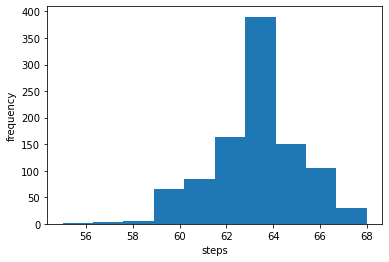

In [4]:
N = 1000

Steps = np.repeat(0, N)
for i in range(N):
    Steps[i] =   obstacle_agent(5,0.2,False)
    
print(np.mean(Steps))

import matplotlib.pyplot as plt
plt.hist(Steps, bins = 10)
plt.xlabel("steps")
plt.ylabel("frequency")
plt.show()